In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from tqdm.notebook import tqdm
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms

from sklearn.datasets import fetch_openml
from scipy.io import loadmat

# device = 'cuda' if torch.cuda.is_available() else 'cpu' #! GPU memory insufficient
device = "cpu"

plt.style.use('seaborn')
np.__version__, device

/tmp/ipykernel_5342/3665943860.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


('1.26.4', 'cpu')

In [2]:
import sys
sys.path.append("/home/autrio/college-linx/SMAI/smai-m24-assignments-Autrio/")
import os
os.chdir("/home/autrio/college-linx/SMAI/smai-m24-assignments-Autrio/")

## Q4.2 CNN Autoencoder

In [3]:
from models.Autoencoders.data import *
import models.Autoencoders.cnnAutoencoder as CNNautoencoder


NOTE pls extract the fashion mnist dataset before running as the files proved too big to be loaded onto git

In [4]:
params = {
    'lr' : 1e-3,
    'batch_size': 512,
    'epoch': 20, 
    'use_dropout': True,
    'kernel_size': 3,
    'padding': 1,
    'task' : 'single',
    'latent_dims' : 7  #! optimal obtained from scree plot later
}

In [5]:
train_loader,test_loader,y_train,y_test = Loader(params=params)

In [6]:
single_batch = next(iter(test_loader))
inputs, labels = single_batch

sample_tensor = inputs
print(sample_tensor.shape)
sample_label = labels[0]
print(np.unique(sample_label.numpy()))

torch.Size([512, 1, 28, 28])
[9.]


In [7]:
net = CNNautoencoder.Autoencoder(params=params)

In [8]:
metrics = None

model = CNNautoencoder.Model(model=net)
model.set_attr(loss_fn=nn.MSELoss(),train_loader=train_loader,val_loader=test_loader,
               device=device,params=params,metrics=metrics,logger=None)

In [9]:
model.train()

Training:   0%|          | 0/20 [00:00<?, ?epoch/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 0] Train:[loss:0.13526747022139823]  Val:[loss:0.11074239052832127]


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 1] Train:[loss:0.09447569810485436]  Val:[loss:0.08586217872798443]


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 2] Train:[loss:0.07692395687355834]  Val:[loss:0.07273262590169907]


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 3] Train:[loss:0.07105327902709023]  Val:[loss:0.07025328576564789]


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 4] Train:[loss:0.06887812123207723]  Val:[loss:0.06761158518493175]


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 5] Train:[loss:0.06618142225858518]  Val:[loss:0.06588506288826465]


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 6] Train:[loss:0.06466647379605447]  Val:[loss:0.06517194882035256]


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 7] Train:[loss:0.06373075016979445]  Val:[loss:0.06441317908465863]


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 8] Train:[loss:0.06343115787258592]  Val:[loss:0.06305317115038633]


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 9] Train:[loss:0.06323521881032798]  Val:[loss:0.06390469204634427]


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 10] Train:[loss:0.06276749434360003]  Val:[loss:0.06345320846885442]


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 11] Train:[loss:0.06255870476617652]  Val:[loss:0.06265406403690577]


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 12] Train:[loss:0.06224235497667628]  Val:[loss:0.06231929007917643]


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 13] Train:[loss:0.06208192692848585]  Val:[loss:0.06261299662292004]


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 14] Train:[loss:0.06193938592480401]  Val:[loss:0.06280859541147947]


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 15] Train:[loss:0.061912846388453145]  Val:[loss:0.061785572208464146]


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 16] Train:[loss:0.06157488338017868]  Val:[loss:0.06248531434684992]


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 17] Train:[loss:0.061608548449762796]  Val:[loss:0.06231910157948732]


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 18] Train:[loss:0.06147121312885971]  Val:[loss:0.06210061497986317]


  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 19] Train:[loss:0.061296810380230514]  Val:[loss:0.061908208578824994]


In [10]:
model.save(path="./CnnAutoencoder-2.pth")

Model saved to ./CnnAutoencoder-2.pth


In [11]:
model.load(path="./CnnAutoencoder-2.pth")

Model loaded from ./CnnAutoencoder-2.pth


/home/autrio/college-linx/SMAI/smai-m24-assignments-Autrio/models/Autoencoders/cnnAutoencoder.py:151: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(p

### Q4.2.3 Plots and visualisation

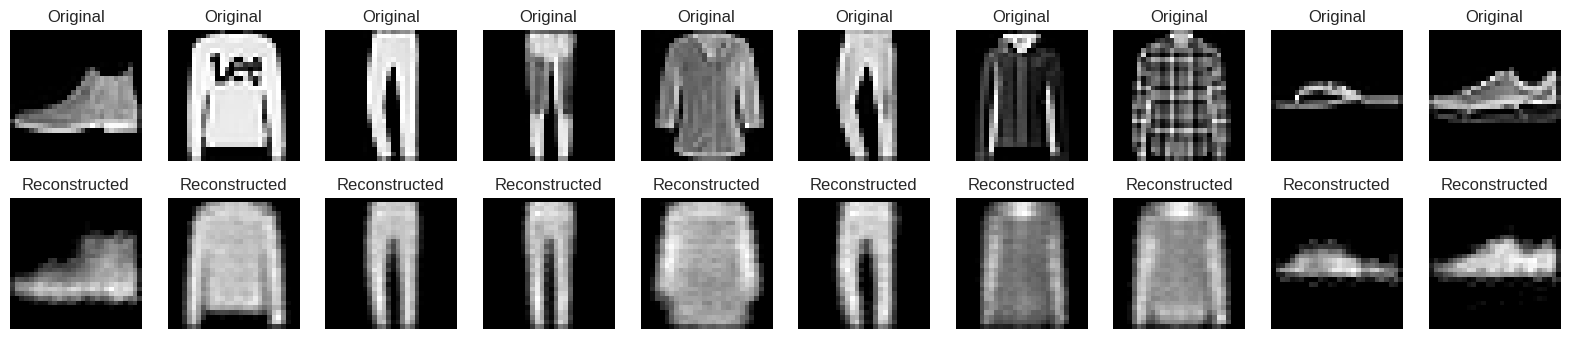

In [12]:
def visualise(model, dataloader, num_images=10):
    model.model.eval()
    
    org, recon = [], []
    
    with torch.no_grad():
        for batch in dataloader:
            x, _ = batch
            x = x.to(model.device)
            y_pred = model.model(x)
            
            org.extend(x.cpu().numpy())
            recon.extend(y_pred.cpu().numpy())
            
            if len(org) >= num_images:
                break

    
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(org[i].squeeze(), cmap="gray")
        plt.title("Original")
        plt.axis("off")

        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(recon[i].squeeze(), cmap="gray")
        plt.title("Reconstructed")
        plt.axis("off")

    plt.show()


visualise(model,test_loader,10)

In [13]:
def get_encoded_data(model,data_loader, device):
    encoded_data = []
    with torch.no_grad():
        for x, _ in tqdm(data_loader, desc="Encoding data"):
            x = x.to(device)
            for layer in model.model.encoder:
                x = layer(x)
            x = x.view(-1, 128 * 3 * 3)
            encoded = model.model.fc1(x)
            encoded_data.append(encoded.cpu().numpy())
    return np.concatenate(encoded_data)

In [14]:
encoded = get_encoded_data(model,train_loader,device)
print(encoded.shape)

Encoding data:   0%|          | 0/118 [00:00<?, ?it/s]

(60000, 7)


In [15]:
from sklearn.decomposition import PCA
pca2D = PCA(n_components=2)
pca3D = PCA(n_components=3)

X2d = pca2D.fit_transform(encoded)
X3d = pca3D.fit_transform(encoded)


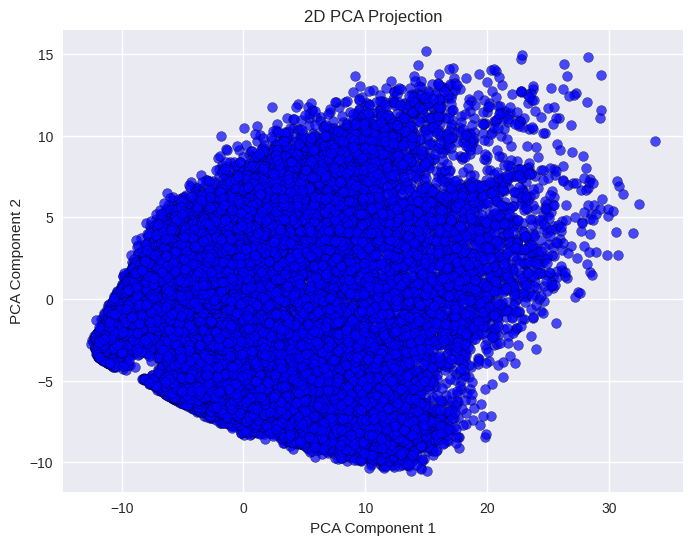

In [16]:

plt.figure(figsize=(8, 6))
plt.scatter(X2d[:, 0], X2d[:, 1], c='blue', edgecolor='k', s=50, alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D PCA Projection")
plt.grid(True)
plt.show()


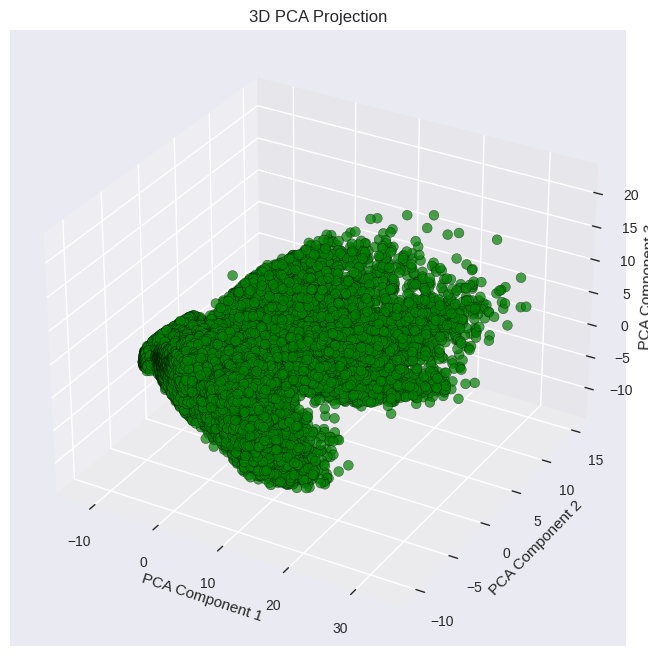

In [17]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3d[:, 0], X3d[:, 1], X3d[:, 2], c='green', edgecolor='k', s=50, alpha=0.7)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D PCA Projection")
plt.show()


## Q4.3 MLP Autoencoder

In [18]:
import models.MLP.MLP2 as mlp

In [19]:
params_mlp = {
    'lr' : 0.01,
    'batch_size':256,
    'epoch': 40,
    'optimizer':"mini-batch",
    'loss_fn':mlp.loss.MSELoss(),
    'activation':mlp.activations.Tanh(),
    "type":"regression"
    }

params_mlp["logger"] = None
MLPautoencoder = mlp.Autoencoder(params=params_mlp,encoding_dim=7) #! optimal obtained from scree plot later


In [20]:
train_path = "./data/external/FashionMNIST/fashion-mnist_train.csv"
test_path = "./data/external/FashionMNIST/fashion-mnist_test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


x_train = train_df.drop(columns=["label"]).to_numpy()
x_test = test_df.drop(columns=["label"]).to_numpy()


In [21]:
x_train = (x_train - x_train.mean())/x_train.std()
x_test = (x_test - x_test.mean())/x_test.std()



In [22]:
x_train.shape

(60000, 784)

In [23]:
MLPautoencoder.Xtrain = x_train
MLPautoencoder.Xtest = x_test
MLPautoencoder.Xval = x_test

MLPautoencoder.Ytrain = x_train
MLPautoencoder.Ytest = x_test
MLPautoencoder.Yval = x_test


MLPautoencoder.set_arch()
print(MLPautoencoder)

Layer: [in:784] [out:32] [activation:Tanh]
Layer: [in:32] [out:16] [activation:Tanh]
Layer: [in:16] [out:8] [activation:Tanh]
Layer: [in:8] [out:7] [activation:Tanh]
Layer: [in:7] [out:8] [activation:Tanh]
Layer: [in:8] [out:16] [activation:Tanh]
Layer: [in:16] [out:32] [activation:Tanh]
Layer: [in:32] [out:784] [activation:Tanh]



In [24]:
MLPautoencoder.train(epochs=params_mlp['epoch'])

Training Autoencoder:   0%|          | 0/40 [00:00<?, ?epoch/s]

Epoch: 1/40 	Train Loss: 0.5301 	Val Loss: 0.4205
Epoch: 11/40 	Train Loss: 0.2951 	Val Loss: 0.3016
Epoch: 21/40 	Train Loss: 0.2801 	Val Loss: 0.2803
Epoch: 31/40 	Train Loss: 0.2720 	Val Loss: 0.2832


In [25]:
import pickle

In [26]:
with open('MLPAutoencoder.pkl', 'wb') as model_file:
    pickle.dump(MLPautoencoder, model_file)

In [27]:
model_file =  open('MLPAutoencoder.pkl', 'rb')
MLPautoencoder = pickle.load(model_file)

## Q4.4 PCA Autoencoder

In [28]:
import models.Autoencoders.pcaAutoencoder as PCAautoencoder

In [29]:
model2 = PCAautoencoder.Model(n=7) #! optimal obtained from scree plot

In [30]:
model2.gather(train_loader)
model2.fit(enc=True)
model2.encode()

tensor([[-9.1642e+00, -7.7299e+00,  1.6500e+00,  ..., -1.4658e+00,
          3.1311e-01, -6.6349e-01],
        [-2.2352e+00, -7.1188e-03,  5.7151e+00,  ...,  2.9754e+00,
         -1.6728e+00,  2.9112e-01],
        [-6.5481e+00,  1.7519e+00,  2.0793e+00,  ..., -4.2479e+00,
         -1.7367e+00, -4.1315e+00],
        ...,
        [-6.9770e+00,  3.9589e+00,  1.3886e+00,  ...,  1.5944e+00,
          2.1853e+00, -1.2007e+00],
        [-1.6881e+00, -4.8397e-01,  4.2736e+00,  ...,  2.1501e+00,
          4.0257e-01, -2.8068e-01],
        [-9.9633e-01, -5.8220e+00,  7.4714e-01,  ...,  7.5570e-01,
          5.2839e+00,  5.1132e-01]])

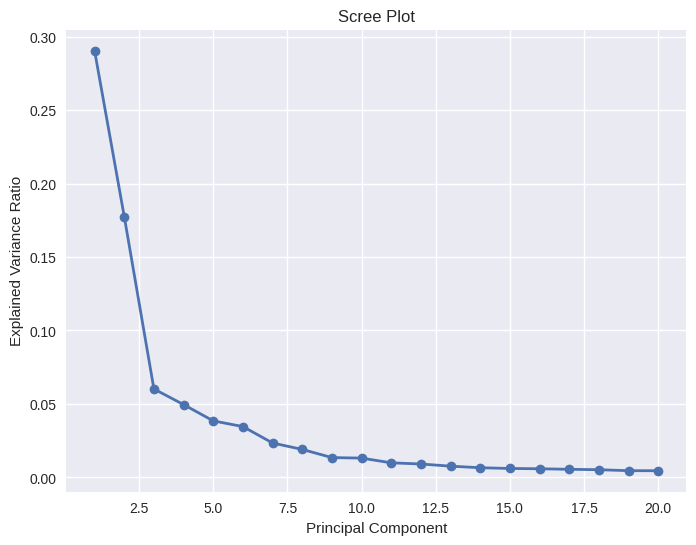

In [31]:
model2.PCA.scree_plot(X=model2.data)

##### This indicates the elbow point or optimal number of dimensions is 6

In [32]:
model2.decode()

tensor([[ 2.8442e-06, -5.3334e-05, -1.5375e-04,  ..., -3.5344e-02,
         -1.1701e-02, -7.9614e-04],
        [ 4.2573e-06, -1.0175e-05, -6.0618e-05,  ...,  1.0403e-02,
         -1.4056e-03, -3.2346e-04],
        [-2.6360e-06,  1.3507e-05,  1.3211e-06,  ...,  2.3462e-02,
          5.9996e-03,  1.1760e-03],
        ...,
        [ 5.7843e-06,  6.5794e-05,  4.0963e-04,  ...,  3.7757e-02,
          1.1210e-02,  8.7567e-04],
        [ 5.5541e-06, -1.2023e-05,  6.1652e-05,  ..., -7.6803e-04,
         -5.5085e-03, -5.0121e-04],
        [ 1.1725e-05,  9.6619e-06,  4.3941e-04,  ..., -2.6750e-02,
         -1.1371e-02, -9.8026e-04]])

In [33]:
model2.calc_recon_error().item() #!reconstruction error

0.07651274651288986

# Q4.5 KNN classification

In [42]:

encoded_train1 = get_encoded_data(model,train_loader,device)

x = x_train
encoded_train2 = MLPautoencoder.encode(x)

x = train_loader
model2.gather(x)
model2.fit(enc=True)
encoded_train3 = model2.encode().cpu().numpy()

Encoding data: 100%|██████████| 118/118 [00:18<00:00,  6.43it/s]


In [43]:
encoded_train3.shape

(60000, 7)

In [44]:
encoded_test1 = get_encoded_data(model,test_loader,device)

x = x_test
encoded_test2 = MLPautoencoder.encode(x)

x = test_loader
model2.gather(x)
model2.fit(enc=True)
encoded_test3 = model2.encode().cpu().numpy()

Encoding data: 100%|██████████| 20/20 [00:02<00:00,  6.72it/s]


In [45]:
encoded_test3.shape

(10000, 7)

In [36]:
from models.knn.knn import *
from performanceMeasures.macros import *

In [37]:
knn1 = KNN()
knn2 = KNN()
knn3 = KNN()


In [38]:
y_test = y_test.reshape(y_test.shape[0],-1)
y_train = y_train.reshape(y_train.shape[0],-1)

In [39]:
knn1.Xtrain = encoded_train1
knn1.Xtest = encoded_test1
knn1.Xval = encoded_test1
knn1.Ytrain = y_train[:,1]
knn1.Ytest = y_test[:,1]
knn1.Yval = y_test[:,1]
knn1.predict(disType="euclid",k=1,batch_size=100,optimized=True)
performance = knn1.inference()
report = Macros(performance)
print(report.macros(mode="macro",encoded=False))

training: 100%|██████████| 10000/10000 [00:19<00:00, 518.33sample/s]

{'accuracy': 0.1035, 'precision': 0.103484603298475, 'recall': 0.10350000000000001, 'F1-score': 0.10348482827395769}


In [40]:
knn2.Xtrain = encoded_train2
knn2.Xtest = encoded_test2
knn2.Xval = encoded_test2
knn2.Ytrain = y_train[:,1]
knn2.Ytest = y_test[:,1]
knn2.Yval = y_test[:,1]
knn2.predict(disType="euclid",k=1,batch_size=100,optimized=True)
performance = knn2.inference()
report = Macros(performance)
print(report.macros(mode="macro",encoded=False))

training: 100%|██████████| 10000/10000 [00:21<00:00, 467.07sample/s]


{'accuracy': 0.0999, 'precision': 0.10006403341926884, 'recall': 0.0999, 'F1-score': 0.09995899904135411}


In [46]:
knn3.Xtrain = encoded_train3
knn3.Xtest = encoded_test3
knn3.Xval = encoded_test3
knn3.Ytrain = y_train[:,1]
knn3.Ytest = y_test[:,1]
knn3.Yval = y_test[:,1]
knn3.predict(disType="euclid",k=1,batch_size=100,optimized=True)
performance = knn3.inference()
report = Macros(performance)
print(report.macros(mode="macro",encoded=False))

training: 100%|██████████| 10000/10000 [00:19<00:00, 522.01sample/s]

{'accuracy': 0.1128, 'precision': 0.10462425195390967, 'recall': 0.11280000000000001, 'F1-score': 0.10421655622554091}


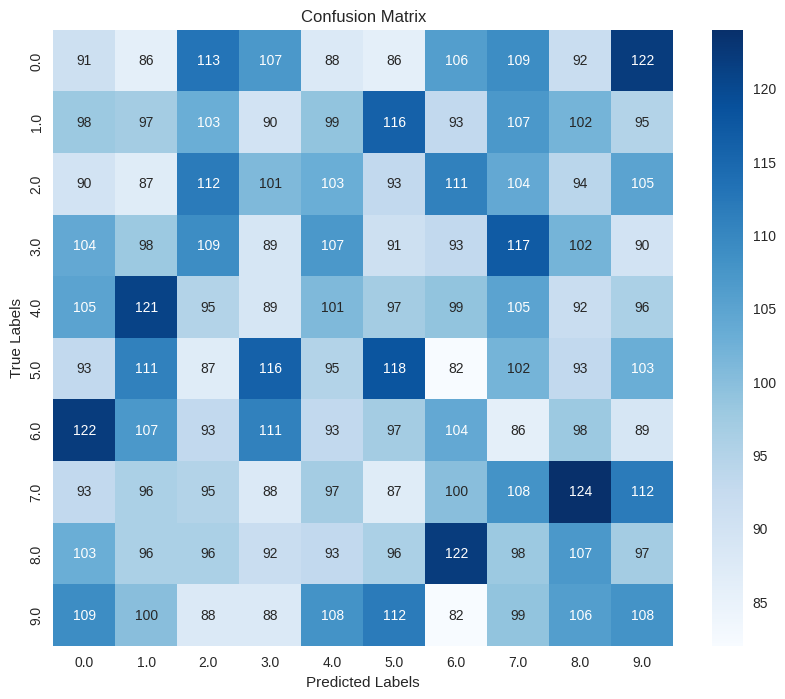

In [47]:
knn1.plot_confusion_matrix()

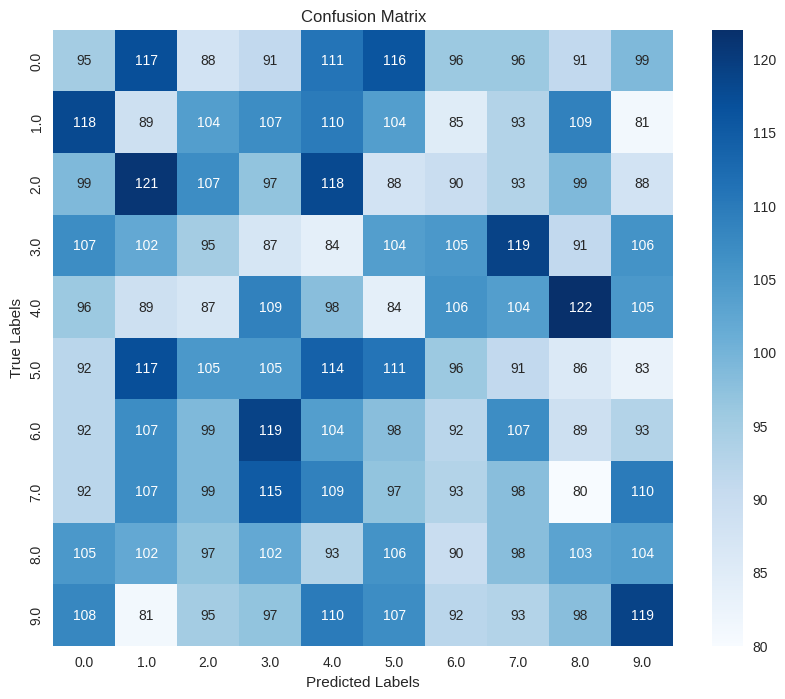

In [48]:
knn2.plot_confusion_matrix()

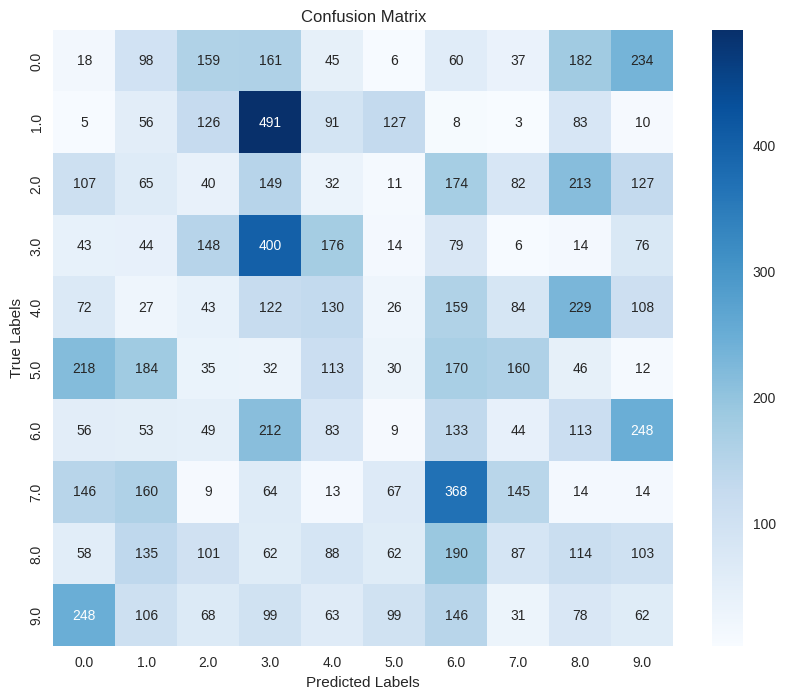

In [49]:
knn3.plot_confusion_matrix()
